### QQPlots

Load in the data below, and use the exercises to assist with answering the quiz questions below.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [54]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [55]:
sample_data.height.describe()

count    200.000000
mean      67.579074
std        3.173014
min       57.565921
25%       65.071402
50%       67.842137
75%       69.904792
max       76.194046
Name: height, dtype: float64

In [56]:
# 3 and 7
height_min = sample_data.height.describe()[3]
height_max = sample_data.height.describe()[7]
number_of_values = sample_data.shape[0]

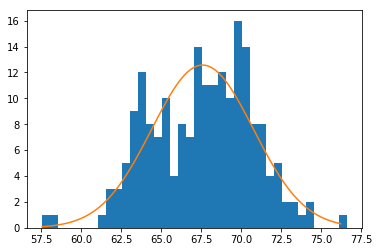

In [57]:
# create a histogram of the data
bin_size = 0.5
bin_edges = np.arange(height_min, height_max + bin_size, bin_size)
plt.hist(data = sample_data, x = 'height', bins = bin_edges);


# overlay a theoretical normal distribution on top
samp_mean = sample_data['height'].mean()
samp_sd = sample_data['height'].std()

from scipy.stats import norm

x = np.linspace(height_min, height_max, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= number_of_values * bin_size # scale the distribution height
plt.plot(x, y);


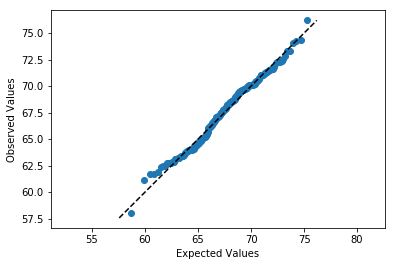

In [58]:
n_points = number_of_values
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)
plt.scatter(expected_vals, sample_data['height'].sort_values())
plt.plot([height_min,height_max],[height_min,height_max],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values');


Text(0, 0.5, 'Observed Standard Scores')

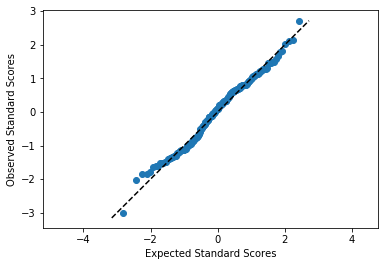

In [59]:
height_min_scaled = (height_min - samp_mean) / samp_sd
height_max_scaled = (height_max - samp_mean) / samp_sd
expected_scores = norm.ppf(qs)
data_scores = (sample_data['height'].sort_values() - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([height_min_scaled,height_max_scaled],[height_min_scaled,height_max_scaled],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores') 


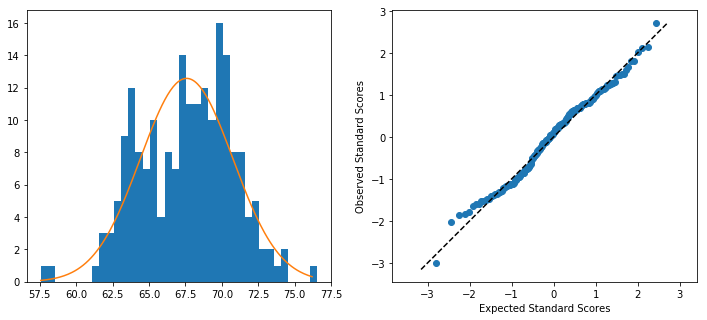

In [60]:
plt.figure(figsize = [12, 5])
# left subplot: plot the data
# create a histogram of the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(height_min, height_max + bin_size, bin_size)
plt.hist(data = sample_data, x = 'height', bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = sample_data['height'].mean()
samp_sd = sample_data['height'].std()
from scipy.stats import norm
x = np.linspace(height_min, height_max, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= number_of_values * bin_size # scale the distribution height
plt.plot(x, y);
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
height_min_scaled = (height_min - samp_mean) / samp_sd
height_max_scaled = (height_max - samp_mean) / samp_sd
expected_scores = norm.ppf(qs)
data_scores = (sample_data['height'].sort_values() - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([height_min_scaled,height_max_scaled],[height_min_scaled,height_max_scaled],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores');

Text(0, 0.5, 'Observed Standard Scores')

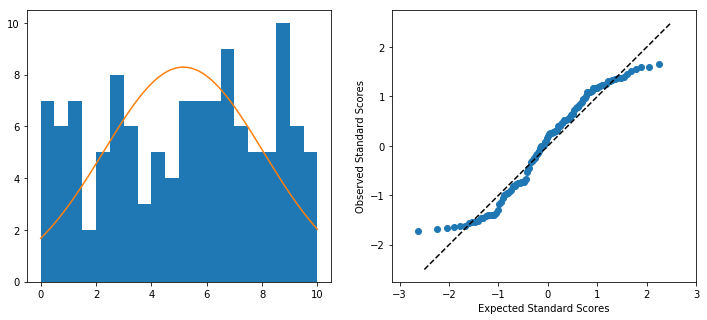

In [61]:
# generate the data

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)
# set up the figure
plt.figure(figsize = [12, 5])
# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x = unif_data, bins = bin_edges);
# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()
from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)
# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)
qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd
plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')


In [62]:
full_data.isna().sum()

user_id          0
age              0
drinks_coffee    0
height           0
dtype: int64

In [64]:
missing = full_data.isna().sum()

In [71]:
missing = missing.reset_index(name='count')

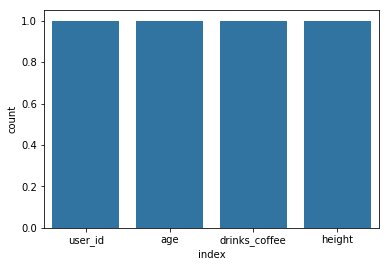

In [122]:
base_color = sb.color_palette()[0]
sb.countplot(data = missing, x='index', color = base_color)


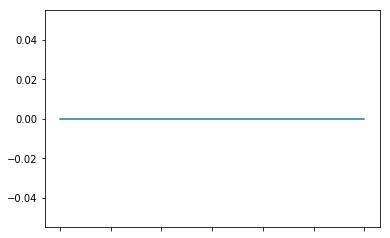

In [69]:
missing.plot()

In [76]:
df = pd.read_csv('prosperLoanData.csv')

In [78]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [142]:
mv = df.isna().sum().reset_index(name = 'count')
mv.set_index('index', inplace=True)
mv

,count
index,
ListingKey,0
ListingNumber,0
ListingCreationDate,0
CreditGrade,84984
Term,0
LoanStatus,0
ClosedDate,58848
BorrowerAPR,25
BorrowerRate,0


(array([63.,  0.,  6.,  0.,  0.,  1.,  0.,  0.,  1., 10.]),
 array([     0. ,  10059.6,  20119.2,  30178.8,  40238.4,  50298. ,
         60357.6,  70417.2,  80476.8,  90536.4, 100596. ]),
 <a list of 10 Patch objects>)

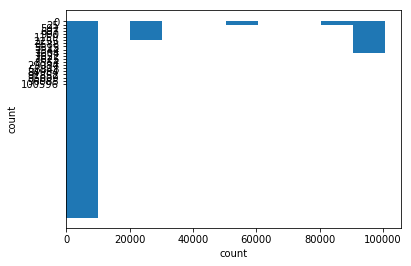

In [148]:
sb.countplot(data = mv.iloc[:,:], y = 'count',  color = base_color)
plt.hist(data = mv, x = 'count')

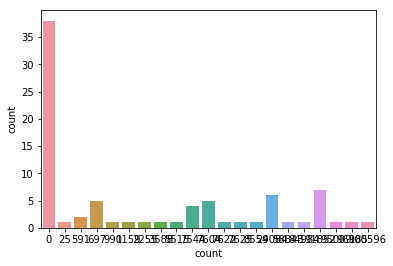

In [121]:
mv = mv.transpose()
mv
sb.countplot(data=mv, x='count')

In [129]:
mv2 = df.isnull()
mv2

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
mv2
# ct_counts = ct_counts.pivot(index = 'cat_var2', columns = 'cat_var1', values = 'count')
# df_all_transposed = df_all.transpose()
mv2 = mv2.transpose()
mv2

,0,1,2,3,4,5,6,7,8,9,...,113927,113928,113929,113930,113931,113932,113933,113934,113935,113936
ListingKey,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ListingNumber,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ListingCreationDate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CreditGrade,False,True,False,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
Term,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LoanStatus,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ClosedDate,False,True,False,True,True,True,True,True,True,True,...,False,False,False,True,True,True,True,True,False,True
BorrowerAPR,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BorrowerRate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LenderYield,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


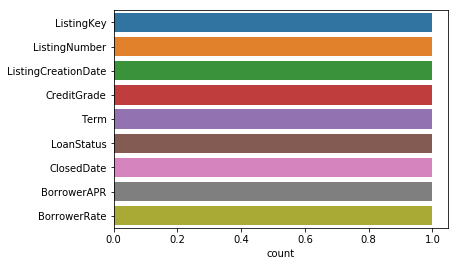

In [158]:
sb.countplot(data=mv2.iloc[:,0:10], y=mv2.iloc[0:9,:].index)

In [151]:
mv2.iloc[:,0:10].index

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [103]:
mv2.iloc[:,0:10]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False
4,False,False,False,True,False,False,True,False,False,False
5,False,False,False,True,False,False,True,False,False,False
6,False,False,False,True,False,False,True,False,False,False
7,False,False,False,True,False,False,True,False,False,False
8,False,False,False,True,False,False,True,False,False,False
9,False,False,False,True,False,False,True,False,False,False


In [ ]:
#base_color = sb.color_palette()[0]
#sb.countplot(data = df, y = 'cat_var', color = base_color)


In [159]:
import matplotlib.pyplot as plt

np.log(s).plot.bar()
plt.show()

NameError: name 's' is not defined

In [160]:
data = df.isnull().sum()/len(df)*100

In [161]:
data


ListingKey                              0.000000
ListingNumber                           0.000000
ListingCreationDate                     0.000000
CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDura

In [165]:
sb.countplot(data.to_frame().iloc[0:9,:])

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

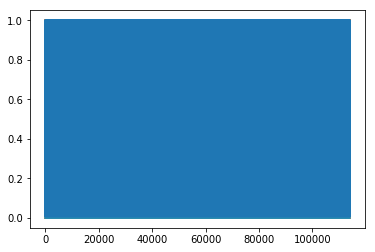

In [170]:
plt.plot(df.isnull());

In [167]:
pcolor(df.isnull())

NameError: name 'pcolor' is not defined

<BarContainer object of 81 artists>

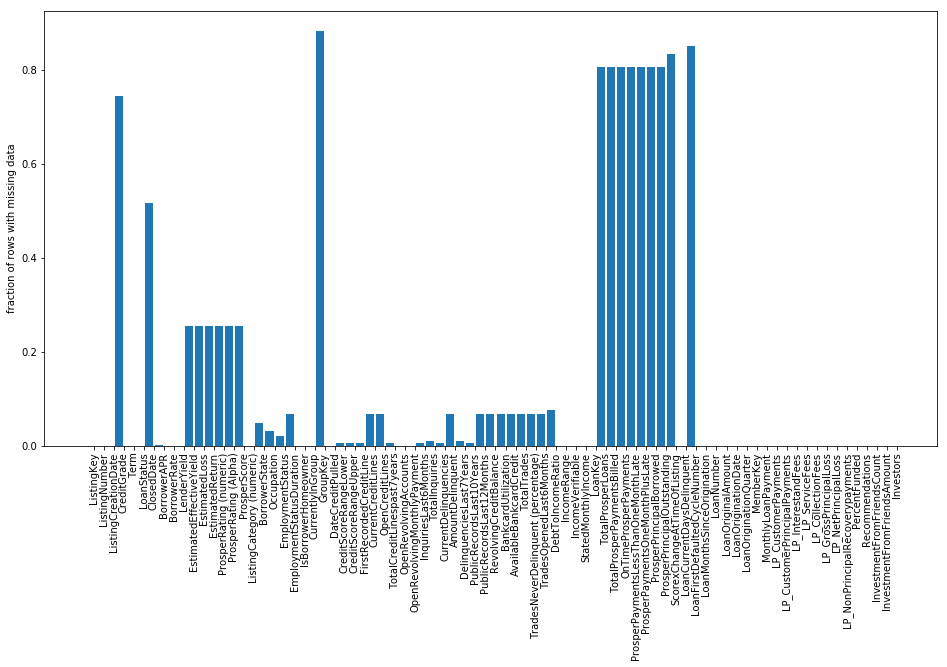

In [200]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<BarContainer object of 81 artists>

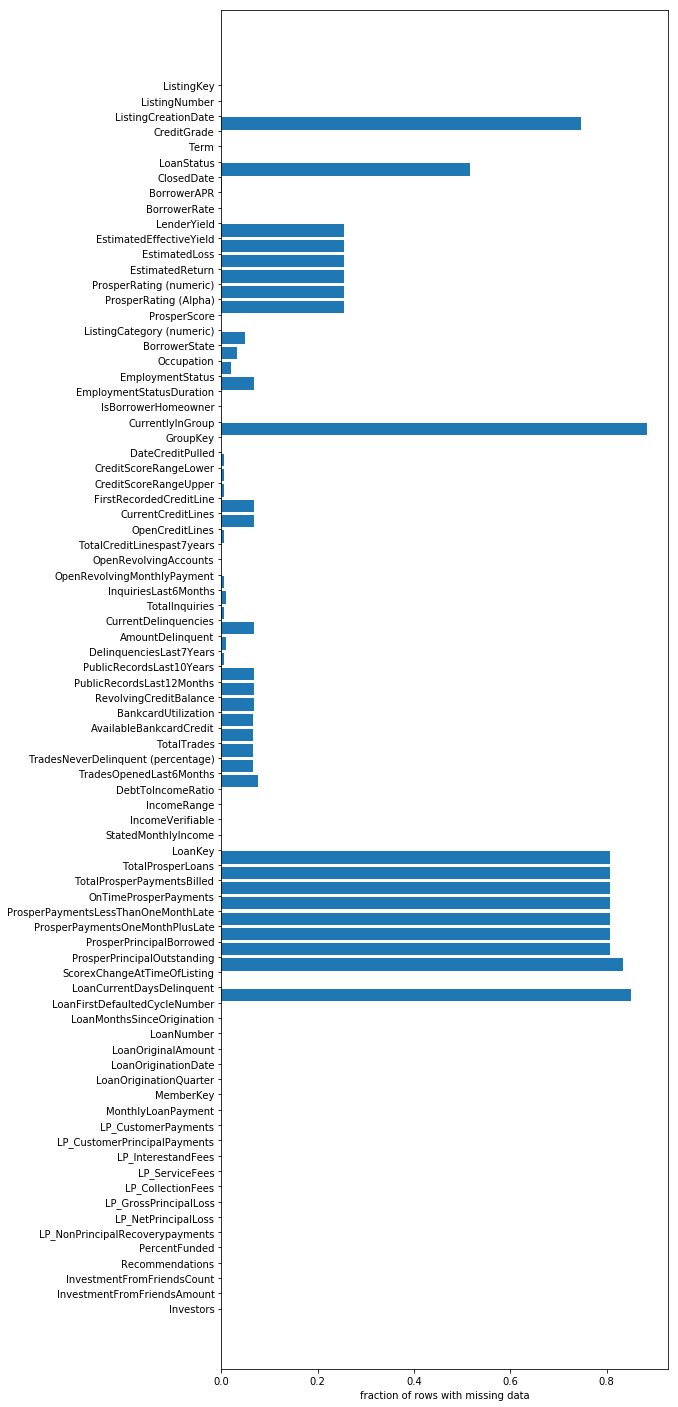

In [206]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(8,25))
plt.yticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='horizontal')
plt.xlabel('fraction of rows with missing data')
plt.gca().invert_yaxis()
plt.barh(np.arange(len(null_counts)),null_counts)

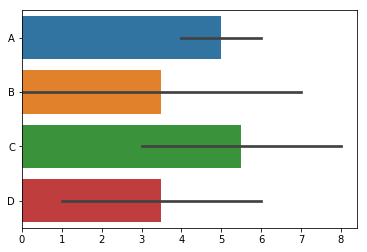

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.DataFrame(np.random.randint(0,10,size=(2, 4)), columns=list('ABCD'))
sns.barplot(data=df, orient = 'h');

In [216]:
df

,A,B,C,D
0,4,7,8,6
1,6,0,3,1
